<a href="https://colab.research.google.com/github/iclx/AnnoCerv/blob/main/data_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset modelling demonstration
### by David Iclanzan
contact: iclanzan@ms.sapientia.ro

In [ ]:
!git clone https://github.com/iclx/AnnoCerv.git

Cloning into 'AnnoCerv'...
remote: Enumerating objects: 927, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 927 (delta 2), reused 10 (delta 1), pack-reused 911
Receiving objects: 100% (927/927), 1.43 GiB | 25.80 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (833/833), done.


# 1. Data Preparation

Resizing the images and loading the annotations.

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

input_folder = "./AnnoCerv/dataset/"
output_folder = "./ResizedDataset/"

In [ ]:
# Create output folder if doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Resize images to specified width
def resize_image(img_path, output_path, width = 256):
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    aspect_ratio = img.shape[1] / img.shape[0]
    new_height = int(width / aspect_ratio)
    resized_img = cv2.resize(img, (width, new_height))
    cv2.imwrite(output_path, resized_img)

# Process each case folder
for case_folder in os.listdir(input_folder):
    case_path = os.path.join(input_folder, case_folder)
    print(f'Processing {case_path}')

    if os.path.isdir(case_path):
        for img_file in os.listdir(case_path):
            if "Aceto" in img_file and (img_file.endswith('.jpg') or img_file.endswith('.png')):
                resize_image(os.path.join(case_path, img_file), os.path.join(output_folder, img_file))


Processing ./AnnoCerv/dataset/Case 70
Processing ./AnnoCerv/dataset/Case 60
Processing ./AnnoCerv/dataset/Case 17
Processing ./AnnoCerv/dataset/Case 16
Processing ./AnnoCerv/dataset/Case 13
Processing ./AnnoCerv/dataset/Case 2
Processing ./AnnoCerv/dataset/Case 97
Processing ./AnnoCerv/dataset/Case 79
Processing ./AnnoCerv/dataset/Case 7
Processing ./AnnoCerv/dataset/Case 92
Processing ./AnnoCerv/dataset/Case 30
Processing ./AnnoCerv/dataset/Case 68
Processing ./AnnoCerv/dataset/Case 8
Processing ./AnnoCerv/dataset/Case 22
Processing ./AnnoCerv/dataset/Case 64
Processing ./AnnoCerv/dataset/Case 23
Processing ./AnnoCerv/dataset/Case 42
Processing ./AnnoCerv/dataset/Case 86
Processing ./AnnoCerv/dataset/Case 94
Processing ./AnnoCerv/dataset/Case 61
Processing ./AnnoCerv/dataset/Case 71
Processing ./AnnoCerv/dataset/Case 45
Processing ./AnnoCerv/dataset/Case 57
Processing ./AnnoCerv/dataset/Case 53
Processing ./AnnoCerv/dataset/Case 76
Processing ./AnnoCerv/dataset/Case 48
Processing ./An

In [ ]:
!ls ./ResizedDataset/

'C100Aceto (1).jpg'  'C24Aceto (3).png'  'C42Aceto (2).jpg'  'C62Aceto (2).png'  'C7Aceto (4).jpg'
'C100Aceto (1).png'  'C25Aceto (1).jpg'  'C42Aceto (2).png'  'C62Aceto (3).jpg'  'C7Aceto (4).png'
'C100Aceto (2).jpg'  'C25Aceto (1).png'  'C42Aceto (3).jpg'  'C62Aceto (3).png'  'C7Aceto (5).jpg'
'C100Aceto (2).png'  'C25Aceto (2).jpg'  'C42Aceto (3).png'  'C63Aceto (1).jpg'  'C7Aceto (5).png'
'C100Aceto (3).jpg'  'C25Aceto (2).png'  'C42Aceto (4).jpg'  'C63Aceto (1).png'  'C80Aceto (1).jpg'
'C100Aceto (3).png'  'C25Aceto (3).jpg'  'C42Aceto (4).png'  'C63Aceto (2).jpg'  'C80Aceto (1).png'
'C10Aceto (1).jpg'   'C25Aceto (3).png'  'C43Aceto (1).jpg'  'C63Aceto (2).png'  'C80Aceto (2).jpg'
'C10Aceto (1).png'   'C26Aceto (1).jpg'  'C43Aceto (1).png'  'C63Aceto (3).jpg'  'C80Aceto (2).png'
'C10Aceto (2).jpg'   'C26Aceto (1).png'  'C43Aceto (2).jpg'  'C63Aceto (3).png'  'C80Aceto (3).jpg'
'C10Aceto (2).png'   'C26Aceto (2).jpg'  'C43Aceto (2).png'  'C63Aceto (4).jpg'  'C80Aceto (3).png'
'C10

# 2. Feature Extraction

 Extracting intensity, texture, gradient, spatial, and color-based features for each pixel.

In [ ]:
from skimage import feature, color

def extract_features(img_path):
    img = cv2.imread(img_path)
    intensity = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Texture feature using Local Binary Pattern
    texture_r5 = feature.local_binary_pattern(intensity, P=8*5, R=5, method='uniform')

    # Gradient features using Sobel operator
    grad_x = cv2.Sobel(intensity, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(intensity, cv2.CV_64F, 0, 1, ksize=3)

    # Spatial features: simply the x and y coordinates
    x = np.arange(img.shape[1])
    y = np.arange(img.shape[0])
    x, y = np.meshgrid(x, y)

    # Color-based features
    hsv_img = color.rgb2hsv(img)
    hue = hsv_img[:, :, 0]
    saturation = hsv_img[:, :, 1]
    value = hsv_img[:, :, 2]

    # Stack all features together
    features = np.dstack((intensity, texture_r5, grad_x, grad_y, x, y, hue, saturation, value))

    return features


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

# Collect data and labels
X_data = []
y_labels = []

for img_file in os.listdir(output_folder):
    if img_file.endswith('.jpg'):
        print(f'\tComputing features for {img_file}')
        features = extract_features(os.path.join(output_folder, img_file))
        X_data.append(features)

        annotation_path = os.path.join(output_folder, img_file.replace('.jpg', '.png'))
        img = cv2.imread(annotation_path)
        annotation = np.array(img[:, :, 0] == 255) & np.array(img[:, :, 2] == 0)
        # Convert blue pixels to label 1, others to 0
        is_junction = annotation.astype(np.int)
        y_labels.append(is_junction)

X_data = np.array(X_data).reshape(-1, 9)
y_labels = np.array(y_labels).reshape(-1)

print(f'Junction class weight: {sum(y_labels)/len(y_labels)}')


	Computing features for C46Aceto (2).jpg
	Computing features for C95Aceto (1).jpg
	Computing features for C6Aceto (2).jpg


<ipython-input-6-c0da6565783d>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  is_junction = annotation.astype(np.int)  # Convert blue pixels to label 1, others to 0


	Computing features for C42Aceto (3).jpg
	Computing features for C48Aceto (2).jpg
	Computing features for C32Aceto (1).jpg
	Computing features for C28Aceto (2).jpg
	Computing features for C56Aceto (1).jpg
	Computing features for C62Aceto (1).jpg
	Computing features for C55Aceto (1).jpg
	Computing features for C42Aceto (4).jpg
	Computing features for C66Aceto (1).jpg
	Computing features for C63Aceto (4).jpg
	Computing features for C85Aceto (2).jpg
	Computing features for C79Aceto (1).jpg
	Computing features for C76Aceto (3).jpg
	Computing features for C16Aceto (1).jpg
	Computing features for C16Aceto (5).jpg
	Computing features for C18Aceto (1).jpg
	Computing features for C13Aceto (5).jpg
	Computing features for C19Aceto (3).jpg
	Computing features for C35Aceto (1).jpg
	Computing features for C12Aceto (6).jpg
	Computing features for C40Aceto (1).jpg
	Computing features for C22Aceto (1).jpg
	Computing features for C66Aceto (2).jpg
	Computing features for C44Aceto (1).jpg
	Computing featu

# 3. Feature Normalization and Export to CSV

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_data_normalized = scaler.fit_transform(X_data)

In [ ]:
del X_data
del scaler

In [ ]:
X_data_normalized.shape

(12925440, 9)

Creating a Scatterplot Matrix (often called a Pair Plot)

In [ ]:
# Sample a subset of the data, for faster processing
sample_size_each_class = 2000

junction_indices = np.where(y_labels == 1)[0]
non_junction_indices = np.where(y_labels == 0)[0]

# Randomly sample from each class's indices
junction_sample_indices = np.random.choice(junction_indices, size=sample_size_each_class, replace=False)
non_junction_sample_indices = np.random.choice(non_junction_indices, size=sample_size_each_class, replace=False)

# Combine the sampled indices
combined_sample_indices = np.concatenate([junction_sample_indices, non_junction_sample_indices])

# Sample the data using the combined indices
X_sample = X_data_normalized[combined_sample_indices]
y_sample = y_labels[combined_sample_indices]

# Convert to DataFrame
data = np.column_stack((X_sample, y_sample))
columns = ['intensity', 'texture_r5', 'grad_x', 'grad_y', 'x', 'y', 'hue', 'saturation', 'value', 'class']
df_sample = pd.DataFrame(data, columns=columns)

# Converting the 'label' column to a categorical type for better plotting
df_sample['class'] = df_sample['class'].astype('category')


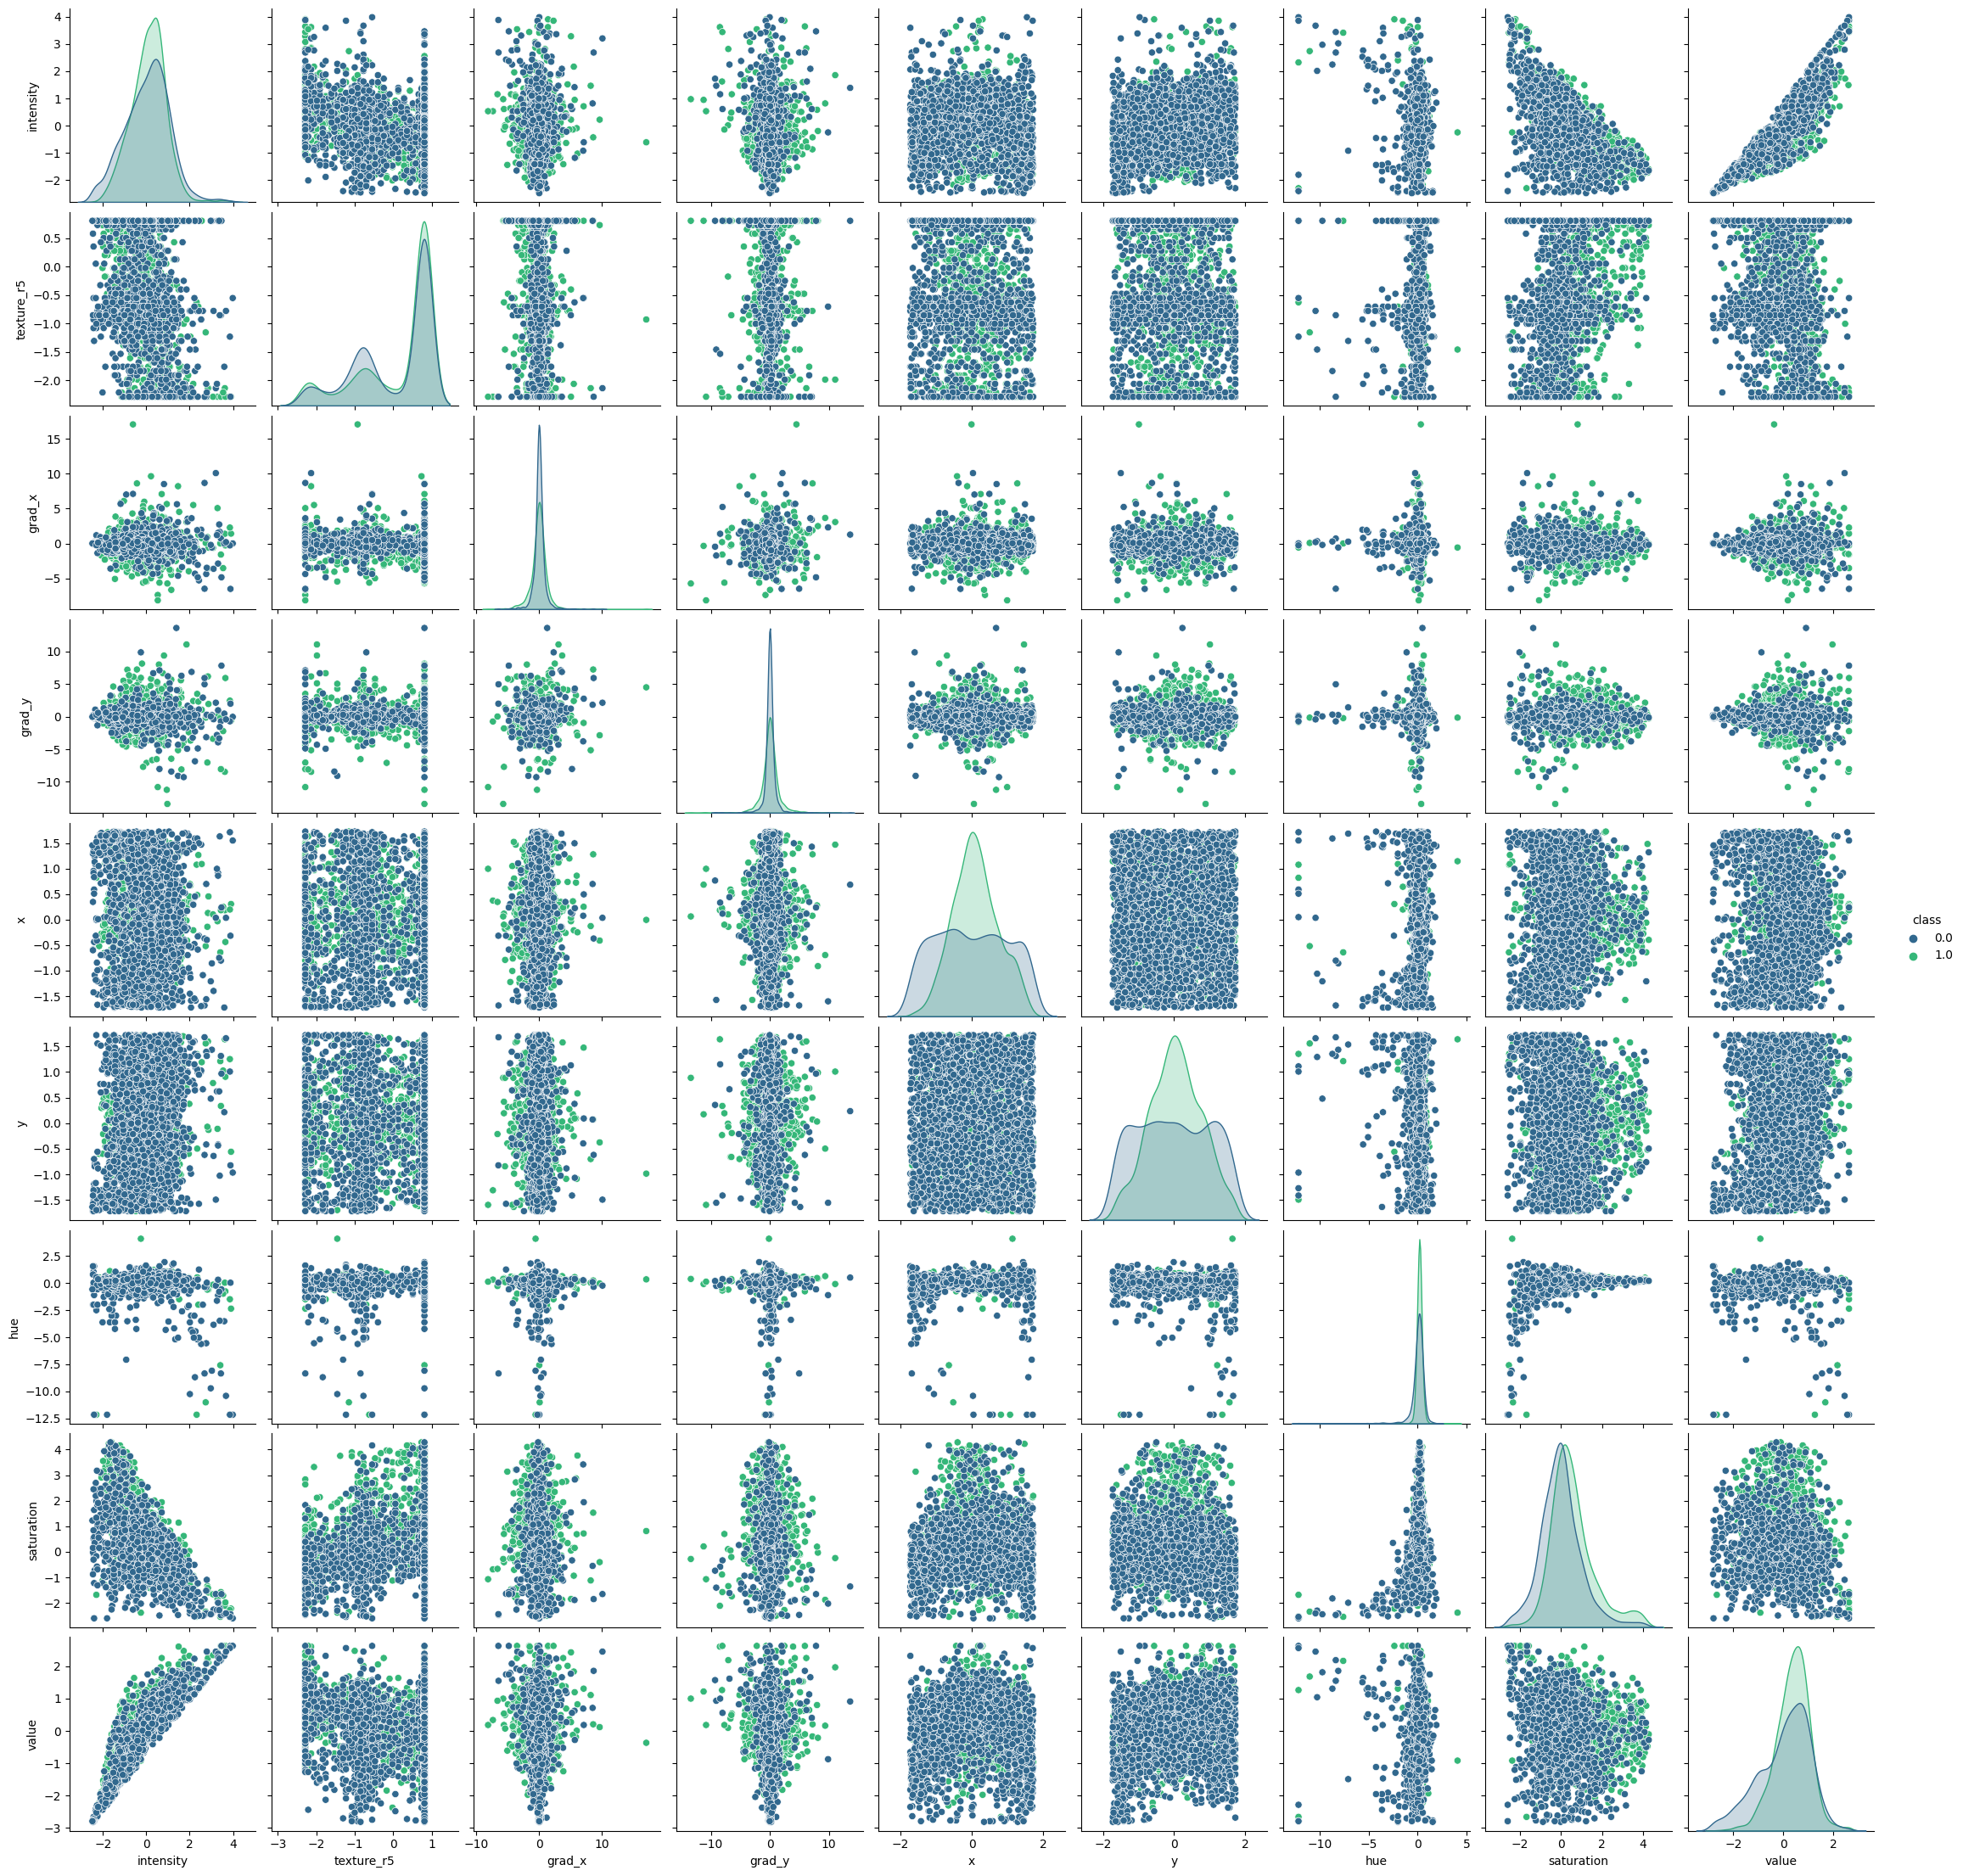

In [ ]:
# Using Seaborn's pairplot function to create the scatterplot matrix for the sampled data
sns.pairplot(df_sample, hue='class', diag_kind='kde', palette='viridis')

# Save the plot to a PDF file
plt.savefig("scatterplot_matrix.pdf", format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
# Save Features and Labels to CSV

df_sample.to_csv('features_and_labels.csv', index=False)

# 4. Exploratory Data Analysis (EDA)



intensity     0.036340
texture_r5    0.052417
grad_x       -0.027687
grad_y        0.007282
x             0.064990
y             0.033636
hue           0.118847
saturation    0.259727
value         0.190899
Name: class, dtype: float64


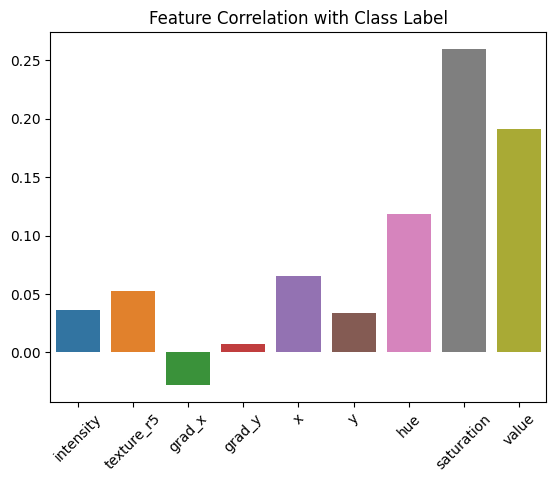

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('features_and_labels.csv')

# Correlation of features with the class label
correlations = df.corr()['class'].drop('class')
print(correlations)

# Plotting correlations
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Feature Correlation with Class Label')
plt.xticks(rotation=45)

# Save the plot to a PDF file
plt.savefig("correlations_barplot.pdf", format='pdf', bbox_inches='tight')

plt.show()

# Model Building and Evaluation

Training a simple classifier and quick evaluation

In [ ]:
X = X_sample
y = y_sample

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Non-Junction', 'Junction']))


              precision    recall  f1-score   support

Non-Junction       0.80      0.78      0.79       400
    Junction       0.79      0.81      0.80       400

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.79       800
weighted avg       0.80      0.80      0.79       800



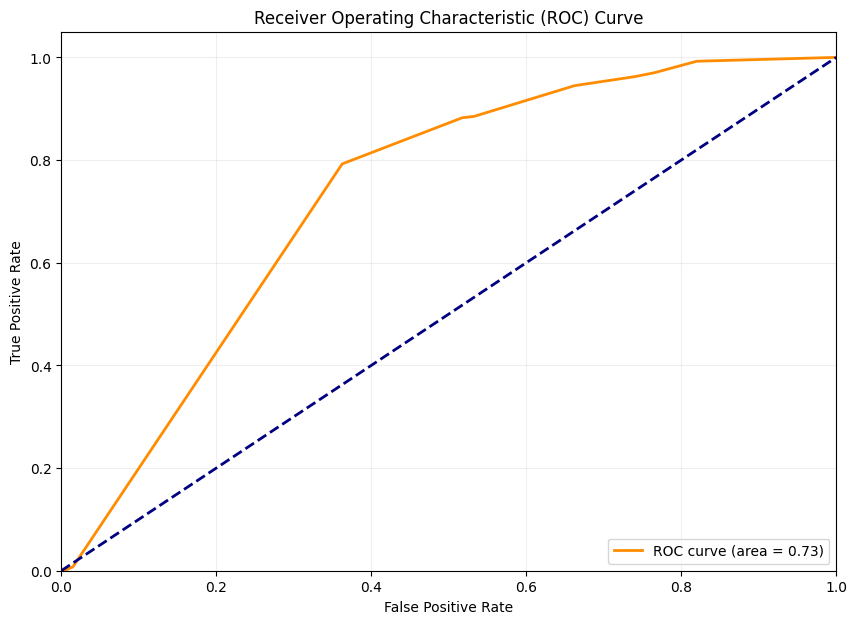

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
# Save the plot to a PDF file
plt.savefig("roc.pdf", format='pdf', bbox_inches='tight')
plt.show()